<a href="https://colab.research.google.com/github/ahassanzadeh/Transactions_Time_Prediction/blob/master/Transaction_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transactions Forcasting






This notebook is summerization of a long-term project with goal to predict the next time, each customer will do transaction through Digit Inc app.  

In [ ]:
# General Libraries and a unsupervised learning library  
from __future__ import division
from datetime import datetime, timedelta,date
import pandas as pd
from pandas import DataFrame as df 
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Filtering warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import Plotly for high quality visulization:
!pip install chart_studio  
!pip install plotly==4.8.2
import chart_studio.plotly as py
import plotly.graph_objects as go

     |████████████████████████████████| 71kB 3.1MB/s 
     |████████████████████████████████| 11.5MB 5.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# import supervised learning libraries 
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

## Data management 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/Projects/Digit/train_val.csv"
tx_data= pd.read_csv(path)
tx_data.columns=['CustomerID','InvoiceDate', 'UnitPrice']
tx_data

,CustomerID,InvoiceDate,UnitPrice
0,54b80cb0cb084b0c00294f2a|6ce908fc9895fdfc035e4...,2018-06-08T00:00:00.000Z,538.0
1,54bde3073deefe0c00a01401|46e37148a68739387c48b...,2017-11-28T00:00:00.000Z,1614.0
2,54c6ea8213078c0c001cec71|044a408e374c8a102b709...,2018-04-02T00:00:00.000Z,22105.0
3,54e643cd95962f0c004cde71|ee74f9800708efd6b39c3...,2018-05-29T00:00:00.000Z,7803.0
4,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,2017-12-07T00:00:00.000Z,25.0
...,...,...,...
1048570,NaN,NaN,NaN
1048571,NaN,NaN,NaN
1048572,NaN,NaN,NaN
1048573,NaN,NaN,NaN


In [ ]:
tx_data.shape

(1048575, 3)

In [ ]:
tx_data.head(10)

,CustomerID,InvoiceDate,UnitPrice
0,54b80cb0cb084b0c00294f2a|6ce908fc9895fdfc035e4...,2018-06-08T00:00:00.000Z,538.0
1,54bde3073deefe0c00a01401|46e37148a68739387c48b...,2017-11-28T00:00:00.000Z,1614.0
2,54c6ea8213078c0c001cec71|044a408e374c8a102b709...,2018-04-02T00:00:00.000Z,22105.0
3,54e643cd95962f0c004cde71|ee74f9800708efd6b39c3...,2018-05-29T00:00:00.000Z,7803.0
4,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,2017-12-07T00:00:00.000Z,25.0
5,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,2017-10-18T00:00:00.000Z,2381.0
6,54e67cc651c9f70c00d49a8b|6a9ac4aefba74c038a149...,2018-03-01T00:00:00.000Z,9990.0
7,54e693f37216210c0042db88|33c26323987617afdcc82...,2018-04-16T00:00:00.000Z,2500.0
8,54e699308eac6c0c00160cfe|b83c984368bdf9354e147...,2018-06-04T00:00:00.000Z,6098.0
9,54e69a1d910e5e0c0058bb98|0c978d2645c67c16857d0...,2017-11-21T00:00:00.000Z,632.0


In [ ]:
tx_data['InvoiceDate'] = tx_data['InvoiceDate']. astype(str).str[:-14]
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])
tx_data

,CustomerID,InvoiceDate,UnitPrice
0,54b80cb0cb084b0c00294f2a|6ce908fc9895fdfc035e4...,2018-06-08,538.0
1,54bde3073deefe0c00a01401|46e37148a68739387c48b...,2017-11-28,1614.0
2,54c6ea8213078c0c001cec71|044a408e374c8a102b709...,2018-04-02,22105.0
3,54e643cd95962f0c004cde71|ee74f9800708efd6b39c3...,2018-05-29,7803.0
4,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,2017-12-07,25.0
...,...,...,...
1048570,NaN,NaT,NaN
1048571,NaN,NaT,NaN
1048572,NaN,NaT,NaN
1048573,NaN,NaT,NaN


In [ ]:
tx_data.describe()

,UnitPrice
count,3.745080e+05
mean,1.489691e+04
std,9.006910e+04
min,1.000000e+00
25%,7.000000e+02
50%,1.997000e+03
75%,6.410000e+03
max,2.006616e+07


In [ ]:
tx_data['InvoiceDate'].describe()

count                  374507
unique                    280
top       2018-01-16 00:00:00
freq                     4489
first     2017-09-14 00:00:00
last      2018-06-20 00:00:00
Name: InvoiceDate, dtype: object

So, based on the describe function, we have about 375k unique customers. The transactions range is recorded for 280 days (9 month).

In [ ]:
# save tx_data in tx_pt
tx_pt = tx_data
tx_pt;

In [ ]:
tx_6m = tx_pt[(tx_pt['InvoiceDate'] < pd.to_datetime('2018-3-20')) & (tx_pt['InvoiceDate'] >=pd.to_datetime('2017-9-14'))].reset_index(drop=True)
tx_next = tx_pt[(tx_pt['InvoiceDate'] >= pd.to_datetime('2018-3-20')) & (tx_pt['InvoiceDate'] < pd.to_datetime('2018-6-20'))].reset_index(drop=True)

In [ ]:
tx_next['InvoiceDate'].describe()

count                  126997
unique                     92
top       2018-04-02 00:00:00
freq                     3886
first     2018-03-20 00:00:00
last      2018-06-19 00:00:00
Name: InvoiceDate, dtype: object

Also, we will create a dataframe called tx_user to possess a user-level feature set for the prediction model:

In [ ]:
tx_user = pd.DataFrame(tx_6m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

# Feature Engineering

For datasets three types of features will be selected:   selected our feature candidates like below:

- Days between the last three purchases(Call it "NextPurchaseDay")
- Recency, Ferequency, Monetary(RFM) scores & clusters 
- Mean & standard deviation of the difference between purchases in days

## Next Purchase Day

One of the usefull featuese for time series data is:   days between last purchase before cut off date and first purchase after that (NextPurchaseDay). 

In [ ]:
#create a dataframe with customer id and first purchase date in tx_next(3 month period)
tx_next_first_purchase = tx_next.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_next_first_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_next_first_purchase.head()

,CustomerID,MinPurchaseDate
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,2018-04-11
1,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2018-03-20
2,53ce0877e0de550b0008841e|a37c17d87ba95d13ce6da...,2018-03-21
3,53ce61957d637d0b006156dd|aa3b3b6983477781e67f5...,2018-04-10
4,53d022557dfe120b004b959c|74f889c4617bef9c54d72...,2018-03-21


In [ ]:
#create a dataframe with customer id and last purchase date in tx_6m
tx_last_purchase = tx_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_last_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_last_purchase.head()

,CustomerID,MaxPurchaseDate
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,2018-03-05
1,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,2018-01-26
2,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2018-03-19
3,53a85392e43196020046b36b|76d3583b46575283f21d8...,2017-12-05
4,53a853aee43196020046c978|9bd3a9269b8f1d37371e5...,2018-02-20


In [ ]:
#merge two dataframes
tx_purchase_dates = pd.merge(tx_last_purchase,tx_next_first_purchase,on='CustomerID',how='left')

In [ ]:
#calculate the time difference in days:
tx_purchase_dates['NextPurchaseDay'] = (tx_purchase_dates['MinPurchaseDate'] - tx_purchase_dates['MaxPurchaseDate']).dt.days


#print tx_user
tx_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,2018-03-05,2018-04-11,37.0
1,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,2018-01-26,NaT,NaN
2,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2018-03-19,2018-03-20,1.0
3,53a85392e43196020046b36b|76d3583b46575283f21d8...,2017-12-05,NaT,NaN
4,53a853aee43196020046c978|9bd3a9269b8f1d37371e5...,2018-02-20,NaT,NaN


In [ ]:
tx_user = pd.merge(tx_user, tx_purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

In [ ]:
tx_user.head()

,CustomerID,NextPurchaseDay
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0
1,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,3.0
2,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0
3,54e67cc651c9f70c00d49a8b|6a9ac4aefba74c038a149...,33.0
4,54e69a1d910e5e0c0058bb98|0c978d2645c67c16857d0...,NaN


In [ ]:
tx_user.shape

(43993, 2)

In [ ]:
tx_user = tx_user.fillna(999)

 I fill NaN with 999 to quickly identify them later.

# RFM scores and clustring  

As customers have different behaviours we cannot treat them all the same, therefore I do customer segmentation to understand them better. 


- **Low Value:** Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.
- **Mid Value:** In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.
- **High Value:** The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

RFM = Recency- Frequency - Monetary is a well-known method for customer segmentation which can categorized customers in the different Values. 

# Recency(Number of Inactive days)
To calculate recency, we need to find out most recent purchase date of each customer and see how many days they are inactive for. After having no. of inactive days for each customer, we will apply K-means clustering to assign customers a recency score.



In [ ]:
#get max purchase date for Recency and create a dataframe
tx_max_purchase = tx_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [ ]:
#find the recency in days and add it to tx_user
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
tx_user.head()

,CustomerID,NextPurchaseDay,Recency
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0,10
1,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,3.0,0
2,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0,11
3,54e67cc651c9f70c00d49a8b|6a9ac4aefba74c038a149...,33.0,18
4,54e69a1d910e5e0c0058bb98|0c978d2645c67c16857d0...,999.0,12


In [ ]:
tx_user['Recency'].describe()

count    43993.000000
mean        36.513764
std         36.058781
min          0.000000
25%          7.000000
50%         24.000000
75%         56.000000
max        185.000000
Name: Recency, dtype: float64

In [ ]:
#plot recency
plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
fig.show()

### K-means clustring to determine the Recency score

We are going to apply K-means clustering to assign a recency score. But we should tell how many clusters we need to K-means algorithm. To find it out, we will apply Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia. Code snippet and Inertia graph are as follows:



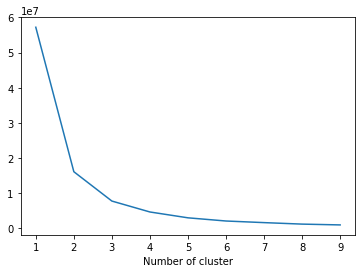

In [ ]:
from sklearn.cluster import KMeans
# Plot inertial(Sum of squared distances of samples to their closest cluster center) respect to Number of cluster 

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()


4 clusters looks apporpriate point in terms of inertial and compuation time. 



In [ ]:
#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

We have calculated clusters and assigned them to each Customer in our dataframe tx_user.
We can see how our recency clusters have different characteristics. The customers in Cluster 3 are very recent compared to Cluster 2.

We have added one function to our code which is order_cluster(). K-means assigns clusters as numbers but not in an ordered way. We can’t say cluster 0 is the worst and cluster 4 is the best. order_cluster() method does this for us.

In [ ]:
#order cluster method

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [ ]:
#order recency clusters
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)
#print cluster characteristics
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2437.0,131.844071,18.915233,108.0,117.0,126.0,145.0,185.0
1,6530.0,82.446401,11.740231,65.0,73.0,82.0,91.0,107.0
2,10119.0,45.847020,10.045396,29.0,35.0,45.0,55.0,64.0
3,24907.0,11.352030,8.578627,0.0,4.0,11.0,18.0,28.0


# Frequency(number of orders)

To create frequency clusters, I need to find total number orders for each customer. First calculate this and see how frequency look like in our customer database:

In [ ]:
#get order counts for each user and create a dataframe with it
#get total purchases for frequency scores
tx_frequency = tx_6m.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']
tx_frequency.head()

,CustomerID,Frequency
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,1
1,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,1
2,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,110
3,53a85392e43196020046b36b|76d3583b46575283f21d8...,1
4,53a853aee43196020046c978|9bd3a9269b8f1d37371e5...,3


In [ ]:
#add frequency column to tx_user
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')
tx_user.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0,10,3,13
1,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,3.0,0,3,26
2,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0,11,3,8
3,54e67cc651c9f70c00d49a8b|6a9ac4aefba74c038a149...,33.0,18,3,5
4,54e69a1d910e5e0c0058bb98|0c978d2645c67c16857d0...,999.0,12,3,64


In [ ]:
tx_user.Frequency.describe()

count    43993.000000
mean         5.625509
std          9.071624
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        121.000000
Name: Frequency, dtype: float64

In [ ]:
# plot frequency 
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)


### **Applying K-means to determine the Recency score**

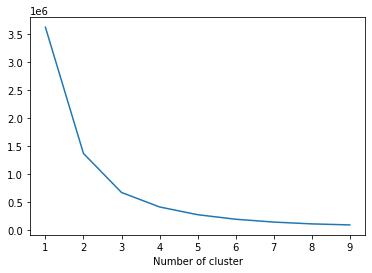

In [ ]:
#Finding the clusting number 

sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# Applying k-Means clustring 
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

In [ ]:
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,36118.0,2.789412,1.872432,1.0,1.0,2.0,4.0,7.0
1,1347.0,32.685226,8.453286,23.0,25.0,30.0,39.0,53.0
2,6172.0,12.381562,3.845594,8.0,9.0,12.0,15.0,22.0
3,356.0,73.845506,15.999164,54.0,60.0,70.5,84.0,121.0


In [ ]:
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)
tx_user.tail(10)


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
43983,587c281d5ab170280015ab01|e904947c62cb65e218768...,999.0,31,2,62,3
43984,5792cc56318c571800064862|faebc6a81be6b64c07411...,999.0,53,2,66,3
43985,5928d2494850512a00f2a0c5|ff242a09ec5b7f16a4941...,999.0,42,2,67,3
43986,560bcd21fa70900f00fe2cae|6fecfafe54d291a0d7d2b...,999.0,34,2,76,3
43987,5971185e0ef28628002ff270|a501779539a0af9f43de7...,999.0,39,2,57,3
43988,59f12d65e73b472600ffc6d9|ff242a09ec5b7f16a4941...,999.0,46,2,72,3
43989,5a735148acbb802500903720|a8b23a383db8d6014ed43...,999.0,56,2,63,3
43990,5a8add8df3322c3900b31743|6fecfafe54d291a0d7d2b...,999.0,32,2,69,3
43991,5a679c53e6ca471b0059e4ef|acce6a332a1fd1a971779...,999.0,39,2,54,3
43992,59baf1d9ed98b226007262e4|6fecfafe54d291a0d7d2b...,999.0,68,1,54,3


In [ ]:
tx_user.describe()

,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
count,43993.000000,43993.000000,43993.000000,43993.000000,43993.000000
mean,529.997068,36.513764,2.306935,5.625509,0.225809
std,481.909332,36.058781,0.917596,9.071624,0.533494
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,7.000000,2.000000,1.000000,0.000000
50%,999.000000,24.000000,3.000000,3.000000,0.000000
75%,999.000000,56.000000,3.000000,6.000000,0.000000
max,999.000000,185.000000,3.000000,121.000000,3.000000


As the same notation as recency clusters, high frequency number indicates better customers.

# Monetary Value(Revenue) 

Let’s see how our customer database looks like when we cluster them based on revenue. I  will calculate revenue for each customer, plot a histogram and apply the same clustering method.



In [ ]:
#calculate monetary value, create a dataframe with it
tx_6m['Revenue'] = tx_6m['UnitPrice'] 
tx_revenue = tx_6m.groupby('CustomerID').Revenue.sum().reset_index()
tx_revenue.head()


,CustomerID,Revenue
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,25000.0
1,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,12100.0
2,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,43200.0
3,53a85392e43196020046b36b|76d3583b46575283f21d8...,9657.0
4,53a853aee43196020046c978|9bd3a9269b8f1d37371e5...,3338.0


In [ ]:
#add Revenue column to tx_user
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')
tx_user.Revenue.describe()


count    4.399300e+04
mean     8.607652e+04
std      6.700521e+05
min      1.000000e+00
25%      2.632000e+03
50%      8.496000e+03
75%      3.489600e+04
max      1.041106e+08
Name: Revenue, dtype: float64

In [ ]:
# plot revenue 

plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)


### Applying k-means clustering to determine the Revenue score:



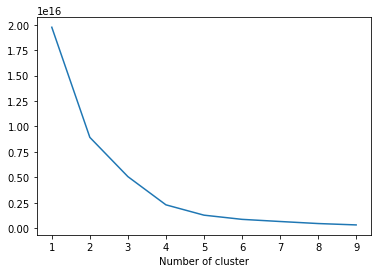

In [ ]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#apply K-Means clustering

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,43451.0,5.105406e+04,1.360946e+05,1.0,2.590000e+03,8237.0,3.245450e+04,1266200.0
1,536.0,2.484511e+06,1.544593e+06,1267880.0,1.534716e+06,1967551.0,2.840645e+06,13090083.0
2,5.0,2.652120e+07,7.384360e+06,20066161.0,2.154871e+07,22421113.0,3.160569e+07,36964337.0
3,1.0,1.041106e+08,NaN,104110597.0,1.041106e+08,104110597.0,1.041106e+08,104110597.0


## Overall score

Now I have scores (cluster numbers) for recency, frequency & revenue. The overal score can be calculated as: 



In [ ]:
tx_user.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0,10,3,13,1,17971.0,0
1,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0,11,3,8,1,71577.0,0
2,54e6a53483a6b00c00ef75bc|e30ab0c4da38f9d8e3220...,28.0,6,3,15,1,7553.0,0
3,54e6ad0d4dbfcd0c0098499f|4cf4f27ad7ad8f06b4fb7...,24.0,14,3,12,1,556936.0,0
4,54e743a10c4b6e0c0061de38|3b1141027e2ed9ba7f174...,2.0,0,3,19,1,13075.0,0


In [ ]:
#calculate overall score and use mean() to see details

tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,131.912613,1.349547,1.265728e+04
1,82.762647,2.014318,2.233477e+04
2,46.762754,2.759317,3.406862e+04
3,14.186363,3.760092,5.040755e+04
4,9.689077,12.872401,1.863715e+05
5,6.402145,28.898123,6.813439e+05
6,4.668380,67.336761,5.734635e+05
7,1.636364,71.363636,6.145792e+06
9,0.000000,95.000000,1.041106e+08


In [ ]:
tx_user.groupby('OverallScore')['Recency'].count()

OverallScore
0     2426
1     6286
2     9311
3    19124
4     4953
5     1492
6      389
7       11
9        1
Name: Recency, dtype: int64

The scoring above clearly shows us that customers with score 9 is our best customers whereas 0 is the worst.

To keep things simple, better we name these scores:

- 0 to 2: Low Value
- 3 to 4: Mid Value
- 5+: High Value

We can easily apply this naming on our dataframe:



In [ ]:
tx_user.loc[tx_user['OverallScore']<2,'Segment'] = 'Low-Value'
tx_user.loc[(tx_user['OverallScore']>2) & (tx_user['OverallScore']<= 4) ,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

Now, it is the best part. Let’s see how our segments distributed on a scatter plot:

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

# fig= go.figure()
plot_data = [
    go.Scattergl(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scattergl(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scattergl(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scattergl(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()


In [ ]:
tx_user.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0,10,3,13,1,17971.0,0,4,Mid-Value
1,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0,11,3,8,1,71577.0,0,4,Mid-Value
2,54e6a53483a6b00c00ef75bc|e30ab0c4da38f9d8e3220...,28.0,6,3,15,1,7553.0,0,4,Mid-Value
3,54e6ad0d4dbfcd0c0098499f|4cf4f27ad7ad8f06b4fb7...,24.0,14,3,12,1,556936.0,0,4,Mid-Value
4,54e743a10c4b6e0c0061de38|3b1141027e2ed9ba7f174...,2.0,0,3,19,1,13075.0,0,4,Mid-Value


# Adding new features

Let’s focus on how we can add the next two features. We will be using shift() method a lot in this part.
First, we create a dataframe with Customer ID and Invoice Day (not datetime). Then we will remove the duplicates since customers can do multiple purchases in a day and difference will become 0 for those.

In [ ]:
tx_6m.head()

,CustomerID,InvoiceDate,UnitPrice,Revenue
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,2017-11-28,1614.0,1614.0
1,54e64674de3f910c0014d567|bac357ccd7c020cf540e8...,2017-12-07,25.0,25.0
2,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,2017-10-18,2381.0,2381.0
3,54e67cc651c9f70c00d49a8b|6a9ac4aefba74c038a149...,2018-03-01,9990.0,9990.0
4,54e69a1d910e5e0c0058bb98|0c978d2645c67c16857d0...,2017-11-21,632.0,632.0


In [ ]:
#create a dataframe with CustomerID and Invoice Date
tx_day_order = tx_6m[['CustomerID','InvoiceDate']]

#Convert Invoice Datetime to day
tx_day_order['InvoiceDay'] = tx_6m['InvoiceDate'].dt.date

tx_day_order = tx_day_order.sort_values(['CustomerID','InvoiceDate'])

#drop duplicates
tx_day_order = tx_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')

Next, by using shift, we create new columns with the dates of last 3 purchases and see how our dataframe looks like:



In [ ]:
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [ ]:
tx_day_order.head()

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate
78194,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,2018-03-05,2018-03-05,NaN,NaN,NaN
127658,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,2018-01-26,2018-01-26,NaN,NaN,NaN
128943,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-02,2017-10-02,NaN,NaN,NaN
42636,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-03,2017-10-03,2017-10-02,NaN,NaN
89191,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-04,2017-10-04,2017-10-03,2017-10-02,NaN


Let’s begin calculating the difference in days for each invoice date:

In [ ]:
tx_day_order['DayDiff'] = (tx_day_order['InvoiceDay'] - tx_day_order['PrevInvoiceDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['InvoiceDay'] - tx_day_order['T2InvoiceDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['InvoiceDay'] - tx_day_order['T3InvoiceDate']).dt.days

In [ ]:
tx_day_order.head(10)

,CustomerID,InvoiceDate,InvoiceDay,PrevInvoiceDate,T2InvoiceDate,T3InvoiceDate,DayDiff,DayDiff2,DayDiff3
78194,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,2018-03-05,2018-03-05,NaN,NaN,NaN,NaN,NaN,NaN
127658,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,2018-01-26,2018-01-26,NaN,NaN,NaN,NaN,NaN,NaN
128943,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-02,2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN
42636,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-03,2017-10-03,2017-10-02,NaN,NaN,1.0,NaN,NaN
89191,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-04,2017-10-04,2017-10-03,2017-10-02,NaN,1.0,2.0,NaN
69566,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-05,2017-10-05,2017-10-04,2017-10-03,2017-10-02,1.0,2.0,3.0
205647,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-06,2017-10-06,2017-10-05,2017-10-04,2017-10-03,1.0,2.0,3.0
65884,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-10,2017-10-10,2017-10-06,2017-10-05,2017-10-04,4.0,5.0,6.0
32541,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-11,2017-10-11,2017-10-10,2017-10-06,2017-10-05,1.0,5.0,6.0
163352,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,2017-10-12,2017-10-12,2017-10-11,2017-10-10,2017-10-06,1.0,2.0,6.0


For each customer ID, we utilize .agg() method to find out the mean and standard deviation of the difference between purchases in days:

In [ ]:
tx_day_diff = tx_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']
tx_day_diff.head()

,CustomerID,DayDiffMean,DayDiffStd
0,53a85331e431960200466a39|140fae5cfea3485ab5c6d...,NaN,NaN
1,53a85378e431960200469d42|76f7222aa18d6b39a7ebd...,NaN,NaN
2,53a85378e431960200469d42|ff242a09ec5b7f16a4941...,1.541284,1.004915
3,53a85392e43196020046b36b|76d3583b46575283f21d8...,NaN,NaN
4,53a853aee43196020046c978|9bd3a9269b8f1d37371e5...,40.500000,47.376154


I only keep customers who have > 3 purchases by using the following line:


In [ ]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['CustomerID'],keep='last')

# Final Output

Finally, NA values are dropped, merge new dataframes with tx_user and apply .get_dummies() for converting categorical values:

In [ ]:
# we drop NA values
tx_day_order_last = tx_day_order_last.dropna()

# merge new dataframes with tx_user
tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='CustomerID')

# apply .get_dummies()
tx_user = pd.merge(tx_user, tx_day_order_last[['CustomerID','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')

tx_user.head()


,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd
0,54bde3073deefe0c00a01401|46e37148a68739387c48b...,17.0,10,3,13,1,17971.0,0,4,Mid-Value,11.0,17.0,23.0,12.500000,8.733426
1,54e659bc2fb32c0c007c030f|8816cf3aede474ecbdb03...,18.0,11,3,8,1,71577.0,0,4,Mid-Value,3.0,10.0,45.0,22.428571,18.884360
2,54e6a53483a6b00c00ef75bc|e30ab0c4da38f9d8e3220...,28.0,6,3,15,1,7553.0,0,4,Mid-Value,15.0,25.0,39.0,10.785714,5.976603
3,54e6ad0d4dbfcd0c0098499f|4cf4f27ad7ad8f06b4fb7...,24.0,14,3,12,1,556936.0,0,4,Mid-Value,4.0,31.0,48.0,14.000000,8.449852
4,54e743a10c4b6e0c0061de38|3b1141027e2ed9ba7f174...,2.0,0,3,19,1,13075.0,0,4,Mid-Value,10.0,11.0,26.0,9.166667,5.349546


In [ ]:
len(tx_user)

19201

In [ ]:
tx_class = tx_user.copy()
tx_class = pd.get_dummies(tx_class)
tx_class.tail(10)

,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,DayDiff,DayDiff2,DayDiff3,DayDiffMean,DayDiffStd,CustomerID_53a85378e431960200469d42|ff242a09ec5b7f16a4941334c39783ea|0,CustomerID_53ce0877e0de550b0008841e|a37c17d87ba95d13ce6dae872e545478|0,CustomerID_53ce61957d637d0b006156dd|aa3b3b6983477781e67f5e8a53e7a0d2|0,CustomerID_53cfb9b70c59fd0b00cf5143|9c184805bc43c862209d99a72a0acbb0|1,CustomerID_53d022557dfe120b004b959c|74f889c4617bef9c54d72021fdf968d2|1,CustomerID_53ea489e9f7fbf0b002774ec|e9f827b3ee378184f7a2a584d74db310|0,CustomerID_543871a1e5c00e0b00232827|8b59a1f952c65c0d21baee686c33a35a|0,CustomerID_54442722428a7a0b00848e55|03ae3a4cad706bbf4e4cc08076dcfb30|0,CustomerID_5490a4b3ae82d00b00c275b5|18255c2f30168f1be6471ce95608b28f|0,CustomerID_5490a4b3ae82d00b00c275b5|ddb757e2fea5a452cfb1c53ad53155aa|0,CustomerID_5494a7315e936f0b008abb96|21c603dbf852f78063f98674640ab339|0,CustomerID_54aafcbbc165630900b2a979|f60c35bd38b61dc215fccf214a8704c9|1,CustomerID_54ad727ddc76040900d55051|82267c03919ef18dabc330b6fc52d551|0,CustomerID_54ad727ddc76040900d55051|c62533d121e07e8dc7e01ad7a3a1076e|0,CustomerID_54ad727ddc76040900d55051|db31a69f37cc175418b78deb3b8da76a|0,CustomerID_54ae06ff6b086c0b00ca82dc|7dc6aa2382fa235bb3dbef412c196aae|0,CustomerID_54af62e8a2839e0b002e954e|9c263d8d73a2ae636e820f228d7573e8|0,CustomerID_54b02746eeb8be0b00ad04e0|c8079d7e8e5a9bb9c9a3e6c6645660ad|0,CustomerID_54b36b713f23a40b000b8c52|2d0d4809e6bdb6f4db3e547f27b1873c|0,CustomerID_54b4106019e5e80b008ddf1d|6d4a5bea1d14c3165a6251e2279af962|0,CustomerID_54b7e8b816e2d80c0069988f|f24d9282d471bd47e084677cee36a966|0,CustomerID_54b80cb0cb084b0c00294f2a|6ce908fc9895fdfc035e498fb0c40116|0,CustomerID_54b816f84eae8c0b0066e297|36b2fab8ba8d8bc34a99ff581c1b60d2|0,CustomerID_54b86d84dddbe70c0022df6c|a4b8d8dc126f4613b7eb884404da900c|1,CustomerID_54b94784d59ec20c00e3cee7|294b0c4f553e5c0a4130351c27c62937|0,CustomerID_54bde3073deefe0c00a01401|46e37148a68739387c48bd5747690bcd|0,CustomerID_54beb92c068f220c00476c8e|f116acfe9147494063e58da666d1d57e|0,...,CustomerID_5b25483e329548250016927e|55034e15c0b33a2ed5985dcae87280a9|0,CustomerID_5b2560589ec00125004fe0fe|0ba4439ee9a46d9d9f14c60f88f45f87|0,CustomerID_5b25657c7afeb425004a9703|cdcde77800c483980026a318cfd06ff0|0,CustomerID_5b256d7fc908012f00ca150a|bd545a0280d76656b9422393d9afc245|0,CustomerID_5b25d2528d14c22500e16608|d3739b700eb13df2dc1250ab2822ae0c|1,CustomerID_5b25d9a601c45f2500dfc532|dccaf81846b80a77d109eb6f035493c6|0,CustomerID_5b2685f901c45f2500dfdaec|04a8ca7bf49e7ecb4a32451676e929f0|0,CustomerID_5b27101f62e3ce1b0012e9c0|ebf30c411fe95dbc7c26bac0597f5033|0,CustomerID_5b27590faea6a61b004505a4|04a8ca7bf49e7ecb4a32451676e929f0|0,CustomerID_5b27b79f70cbad1b005d6efb|0846dccad3d1729425d4ea29e7dffabd|0,CustomerID_5b27ddcf9946071b004722fd|a4b8d8dc126f4613b7eb884404da900c|0,CustomerID_5b27f66fe0531e1b00dc7d73|d8f849acc7f019237f036f787ab8ff5b|1,CustomerID_5b285c7e1e5b321b00995ed1|94909dba5100370ab378348c2276e63c|1,CustomerID_5b290b7509bc85250002c7c5|f0b4afe2644bcffdd774c20cb009c94d|0,CustomerID_5b2912b8e1dbaf2f00a8df84|21906f99dd62fa3c20a351b6f897f8da|1,CustomerID_5b2938a1e5d41e2f007084d9|6f398e08a15aae639c5840135d68a2a0|0,CustomerID_5b29495692d0712f0009d3f4|e30ab0c4da38f9d8e3220f4080ae9454|0,CustomerID_5b296d06717f841b00cfaa3c|571a1721c2f61eb62b199b2fbb78e3bd|0,CustomerID_5b297390eb745b1b0014d809|2d0d4809e6bdb6f4db3e547f27b1873c|0,CustomerID_5b297eb3eb745b1b0014dae6|fabbc3196f32cec57a9de8c517499b00|1,CustomerID_5b298d4e323cc01b0036560f|2d0d4809e6bdb6f4db3e547f27b1873c|0,CustomerID_5b29a82a7d7dab1b00161c8a|c701addab83f14d4f35b103e1a1f7c6c|1,CustomerID_5b29a8cf8ca0451b00b88851|2d0d4809e6bdb6f4db3e547f27b1873c|0,CustomerID_5b29aa7675f67f1b0071a699|c708162f0339726a2572d8cc015df119|0,CustomerID_5b29c6f74974ec1b008ac48f|d5ffa3de7deb1346b52ef191db59ef70|0,CustomerID_5b29d782e3e80f1b0055c5bb|ff2508c79c6621a34a7fdc99c67b10ab|1,CustomerID_5b2a22aeaa70481b00fdfbdb|3b1141027e2ed9ba7f17420a8ee707b5|0,CustomerID

In [ ]:
tx_user.NextPurchaseDay.describe()

count    19201.000000
mean       333.259101
std        451.402885
min          1.000000
25%         17.000000
50%         32.000000
75%        999.000000
max        999.000000
Name: NextPurchaseDay, dtype: float64

Deciding the boundaries is a question for both statistics and business needs. It should make sense in terms of the first one and be easy to take action and communicate. Considering these two, we will have three classes:

- 0–20: Customers that will purchase in 0–20 days — Class name: 2
- 21–49: Customers that will purchase in 21–49 days — Class name: 1
- ≥ 50: Customers that will purchase in more than 50 days — Class name: 0


In [ ]:
tx_class['NextPurchaseDayRange'] = 2
tx_class.loc[tx_class.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
tx_class.loc[tx_class.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0


In [ ]:
# Perchentage of use base of next purchase date 
tx_class.NextPurchaseDayRange.value_counts()/len(tx_user)

0    0.398052
1    0.330504
2    0.271444
Name: NextPurchaseDayRange, dtype: float64

27% of the user are likely to purchase in the next 20 days. 

The last step is to see the correlation between our features and label. The correlation matrix is one of the cleanest ways to show this:( the heatmap is computationally expensive, unceomment the following three lines, if you would like to see it) 

In [ ]:
tx_class = tx_class.drop('NextPurchaseDay',axis=1)

In [ ]:
len(tx_class)

19201

## Training and Cross Validation 

For this particular problem, we want to use the model which gives the highest accuracy. Let’s split train and test tests and measure the accuracy of different models:



In [ ]:
X, y = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))


In [ ]:
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

LR [0.64817708 0.65      ]
XGB [0.74453125 0.74427083]
NB [0.65559896 0.45729167]
RF [0.73606771 0.73255208]
Dtree [0.68984375 0.70351562]
KNN [0.46770833 0.46809896]


This result indicate that XGBoost has the best accuarcy.  (~74% accuracy).

## Prediction  Model


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))



Accuracy of XGB classifier on training set: 0.75
Accuracy of XGB classifier on test set: 0.74


In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1538
           1       0.71      0.65      0.68      1292
           2       0.70      0.89      0.78      1011

    accuracy                           0.74      3841
   macro avg       0.74      0.75      0.74      3841
weighted avg       0.75      0.74      0.74      3841

